In [9]:
import numpy as np
import pandas as pd
from sklearn.linear_model import Lasso, Ridge
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import KFold



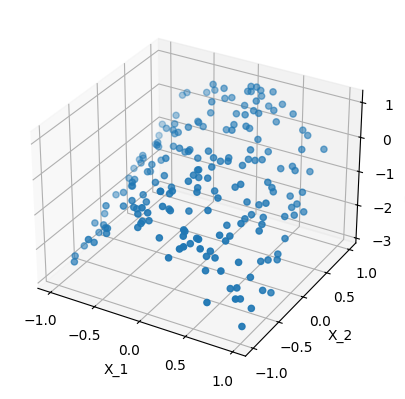

In [2]:
# id:6--12-6 
df = pd.read_csv("week3.csv",sep=',')
x1=df.iloc[:,0]
x2=df.iloc[:,1]
X=np.column_stack((x1,x2))
y=df.iloc[:,2]

#(i)
#(a) plot 3d scatter
fig = plt.figure()
ax = fig.add_subplot(111, projection = '3d')
ax.scatter(X[:, 0], X[:, 1], y)
ax.set_xlabel('X_1')
ax.set_ylabel('X_2')
ax.set_zlabel('Target Value')
plt.show()

1
x1
x2
x1^2
x1 x2
x2^2
x1^3
x1^2 x2
x1 x2^2
x2^3
x1^4
x1^3 x2
x1^2 x2^2
x1 x2^3
x2^4
x1^5
x1^4 x2
x1^3 x2^2
x1^2 x2^3
x1 x2^4
x2^5
feature 0 extented range:-1.1-1.09
feature 1 extented range:-1.1-1.1
C = 1: Coefficients: [ 0. -0.  0. -0.  0.  0. -0.  0. -0.  0. -0.  0. -0.  0.  0. -0.  0. -0.
  0. -0.  0.] Intercept: -0.6246193239272593
Mean Squared Error:  0.8566098838875039


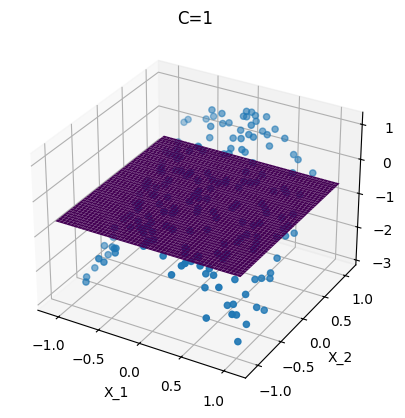

C = 10: Coefficients: [ 0.         -0.          0.81470479 -1.40097391  0.          0.
 -0.          0.         -0.          0.         -0.          0.
 -0.          0.          0.         -0.          0.         -0.
  0.         -0.          0.        ] Intercept: -0.1887485577695297
Mean Squared Error:  0.08482599744900406


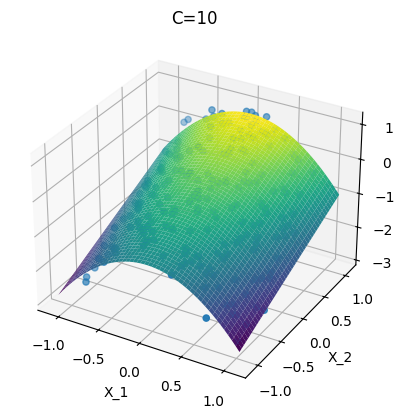

C = 100: Coefficients: [ 0.         -0.          0.89201311 -1.8827773  -0.0025242  -0.
 -0.          0.         -0.01830194  0.08171156 -0.         -0.
 -0.         -0.         -0.         -0.          0.         -0.
  0.         -0.          0.        ] Intercept: -0.04034089895130755
Mean Squared Error:  0.03740135146546221


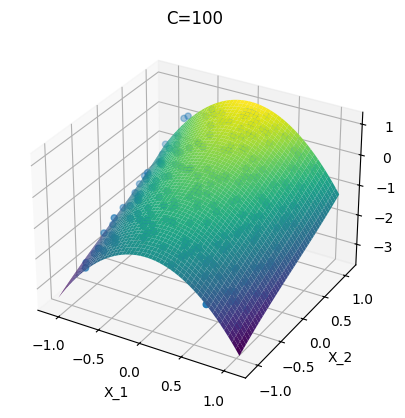

C = 1000: Coefficients: [ 0.          0.01382319  0.85597616 -1.83379715 -0.06493531 -0.04404587
 -0.          0.         -0.09177204  0.1541692  -0.126927    0.
 -0.02187896  0.         -0.         -0.          0.02489572  0.05374524
  0.01558063 -0.03716358 -0.        ] Intercept: -0.01664542586391704
Mean Squared Error:  0.037912788134446186


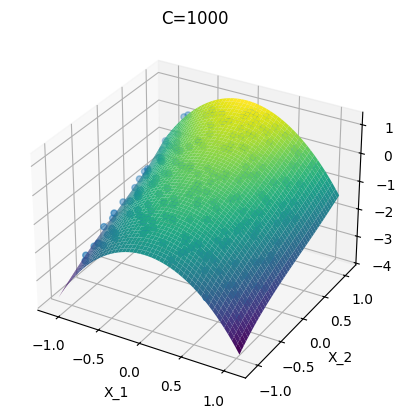

In [4]:
#(b) (c)
poly = PolynomialFeatures(5)
Xpoly5 = poly.fit_transform(X)
Xpoly5_train, Xpoly5_test, y_train, y_test = train_test_split(Xpoly5, y, test_size = 0.2, random_state=1)

feature_names = poly.get_feature_names_out(input_features=['x1', 'x2'])

# Print the feature names
for name in feature_names:
    print(name)

x1_grid = np.linspace(X[:, 0].min() - 0.1,  X[:, 0].max() + 0.1)
x2_grid = np.linspace(X[:, 1].min() - 0.1,  X[:, 1].max() + 0.1)
x1_grid, x2_grid = np.meshgrid(x1_grid, x2_grid)
print("feature 0 extented range:{}-{}".format(x1_grid.min(), x1_grid.max()))
print("feature 1 extented range:{}-{}".format(x2_grid.min(), x2_grid.max()))
x_grid_test = np.c_[x1_grid.ravel(), x2_grid.ravel()]
x_grid_test = poly.fit_transform(x_grid_test)

Crange = [1,10,100,1000]
for C in Crange:
    model = Lasso(alpha = 1/(2*C), fit_intercept=True)
    model.fit(Xpoly5_train, y_train)
    ypred = model.predict(Xpoly5_test)

    # (b) report the parameters
    print("C = {}: Coefficients: {} Intercept: {}".format(C, model.coef_, model.intercept_))
    print("Mean Squared Error: ", mean_squared_error(y_test, ypred))

    fig = plt.figure()
    ax = fig.add_subplot(111, projection = '3d')
    ax.scatter(X[:, 0], X[:, 1], y)

    # (c) draw Xtest and ypred on a 3D surface
    ypred = model.predict(x_grid_test)
    ypred = ypred.reshape(x1_grid.shape)
    
    # Plot surface
    ax.plot_surface(x1_grid, x2_grid, ypred, cmap='viridis', edgecolor='none')

    # Labels
    ax.set_xlabel('X_1')
    ax.set_ylabel('X_2')
    ax.set_zlabel('Output')
    ax.set_title('C={}'.format(C))

    # Show plot
    plt.show()

C = 0.001: Coefficients: [ 0.         -0.01429947  0.08858379 -0.0532102   0.01347574  0.00971854
 -0.0081288   0.02487165 -0.00598551  0.05849753 -0.04622691  0.00908893
 -0.01583873  0.0096465   0.01088771 -0.0040117   0.01484739 -0.00386936
  0.01502677 -0.00343091  0.04458204] Intercept: -0.6047351774458386
Mean Squared Error:  0.7122018596411361


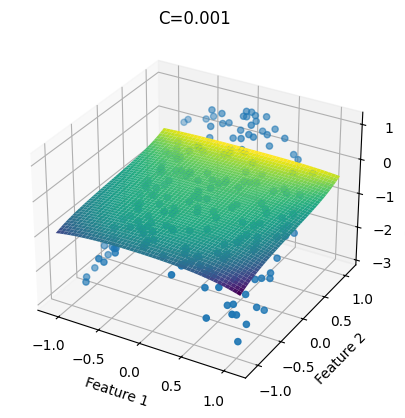

C = 0.01: Coefficients: [ 0.         -0.03963029  0.35834096 -0.36197296  0.0461349   0.03396023
 -0.01399256  0.08835569 -0.01452189  0.21824631 -0.30997555  0.04161291
 -0.11344012  0.03556897  0.033177    0.00590753  0.05112426 -0.00375992
  0.04465151 -0.00679792  0.15566043] Intercept: -0.4656855420854493
Mean Squared Error:  0.30159811316474106


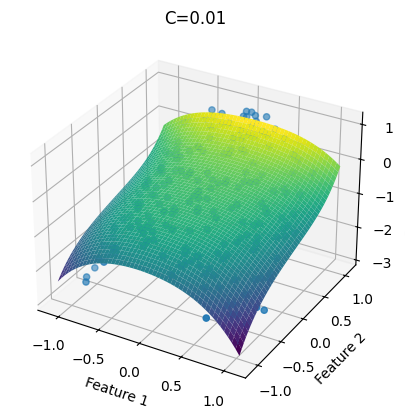

C = 1: Coefficients: [ 0.          0.04047211  0.78326747 -1.3879936  -0.06888793  0.02047714
 -0.04223948  0.03920056 -0.13098296  0.3108342  -0.53239938 -0.03094417
 -0.18765993  0.02123142 -0.01144884 -0.02850902  0.02216191  0.1709225
  0.01498058 -0.07689426 -0.09602121] Intercept: -0.08206743930591742
Mean Squared Error:  0.04175323676871279


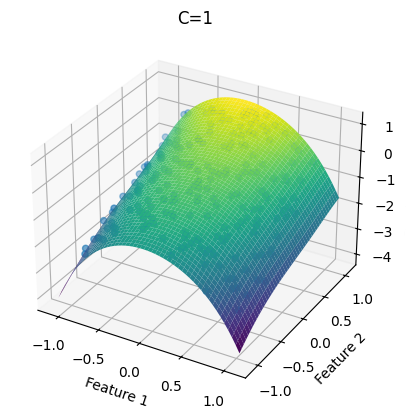

C = 10: Coefficients: [ 0.          0.1263193   0.76278168 -1.7431886  -0.15565933 -0.05938574
 -0.21630147 -0.08246307 -0.3166787   0.59470837 -0.20435999  0.03833583
 -0.07902575  0.11334116  0.06812207  0.03799363  0.13602527  0.55953611
  0.106894   -0.12994252 -0.4097241 ] Intercept: -0.028468563384379086
Mean Squared Error:  0.035469365925642565


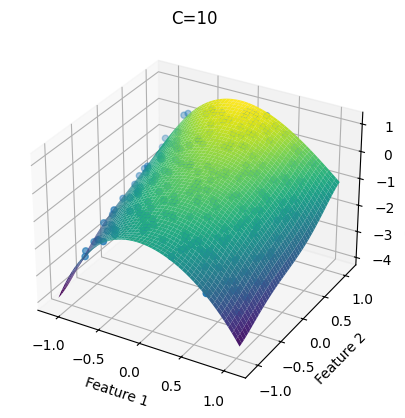

In [16]:
# (e)
Crange = [0.001, 0.01, 1, 10]
for C in Crange:
    model = Ridge(alpha=1/(2*C))
    model.fit(Xpoly5_train, y_train)
    ypred = model.predict(Xpoly5_test)

    # (b) report the parameters
    print("C = {}: Coefficients: {} Intercept: {}".format(C, model.coef_, model.intercept_))
    print("Mean Squared Error: ", mean_squared_error(y_test, ypred))

    fig = plt.figure()
    ax = fig.add_subplot(111, projection = '3d')
    ax.scatter(X[:, 0], X[:, 1], y)

    # (c) draw Xtest and ypred on a 3D surface
    ypred = model.predict(x_grid_test)
    ypred = ypred.reshape(x1_grid.shape)
    
    # Plot surface
    ax.plot_surface(x1_grid, x2_grid, ypred, cmap='viridis', edgecolor='none')

    # Labels
    ax.set_xlabel('Feature 1')
    ax.set_ylabel('Feature 2')
    ax.set_zlabel('Predicted Value')
    ax.set_title('C={}'.format(C))

    # Show plot
    plt.show()

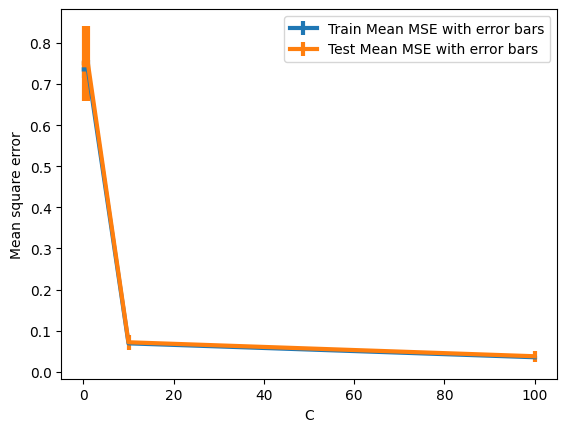

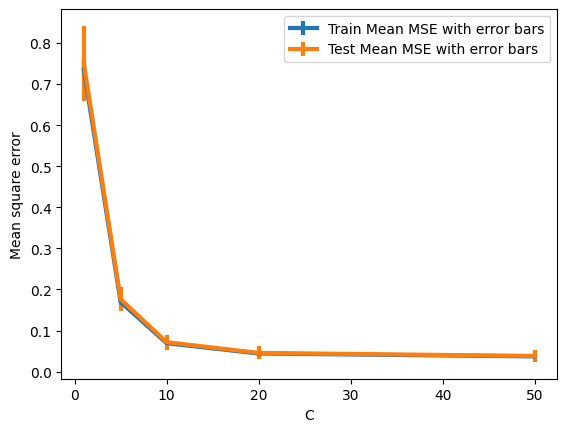

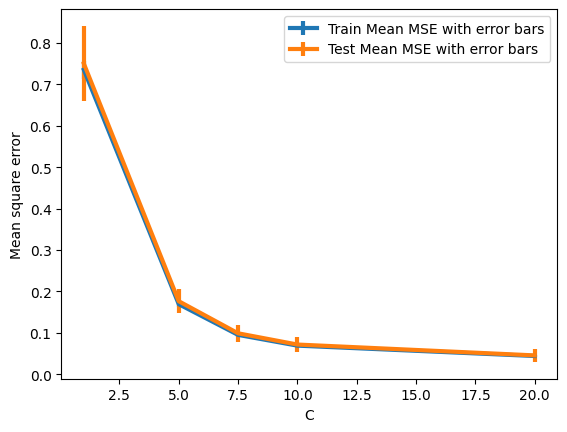

In [28]:
# (ii)
# (a) (b)

def drawErrorBarLasso(Crange):
    kf = KFold(n_splits=5)
    train_mean_error=[]; train_std_error=[]
    test_mean_error=[]; test_std_error=[]	
    for C in Crange: 
        model = Lasso(alpha=1/(2*C))
        temp_train = []
        temp_test = []

        # iterate the 5-fold 
        for train, test in kf.split(Xpoly5): 
            model.fit(Xpoly5[train], y[train]) 

            ypred_train = model.predict(Xpoly5[train]) 
            temp_train.append(mean_squared_error(y[train], ypred_train))

            ypred_test = model.predict(Xpoly5[test]) 
            temp_test.append(mean_squared_error(y[test], ypred_test))

        train_mean_error.append(np.array(temp_train).mean())
        train_std_error.append(np.array(temp_train).std())
        test_mean_error.append(np.array(temp_test).mean()) 
        test_std_error.append(np.array(temp_test).std())

    plt.errorbar(Crange, train_mean_error, yerr=train_std_error, linewidth=3, label='Train Mean MSE with error bars') 
    plt.errorbar(Crange, test_mean_error, yerr=test_std_error, linewidth=3, label='Test Mean MSE with error bars') 
    plt.xlabel('C') 
    plt.ylabel('Mean square error')
    plt.legend(loc='best')
    plt.show()

drawErrorBarLasso([0.1, 1, 10, 100])
drawErrorBarLasso([1, 5, 10, 20, 50])
drawErrorBarLasso([1, 5, 7.5, 10, 20])




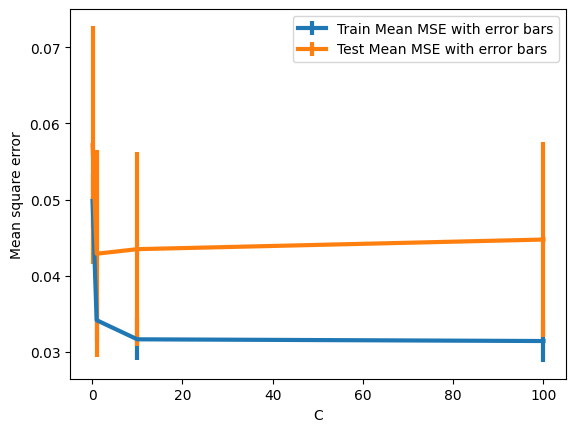

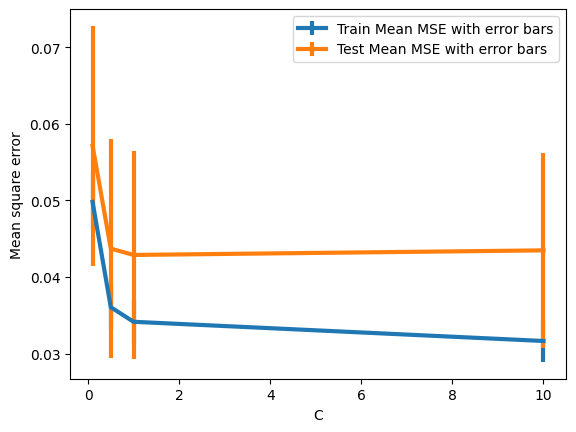

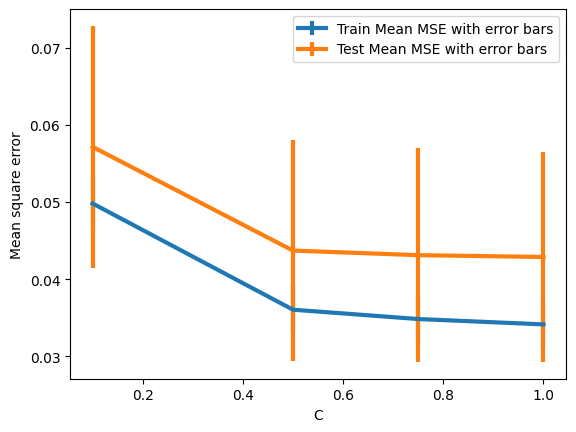

In [32]:

# (c)
# Crange = [0.1, 0.5, 1.5, 2, 2.5, 3, 10]
def drawErrorBarRidge(Crange):
    train_mean_error=[]; train_std_error=[]
    test_mean_error=[]; test_std_error=[]	
    for C in Crange: 
        model = Ridge(alpha=1/(2*C))
        temp_train = []
        temp_test = []

        # iterate the 5-fold 
        for train, test in kf.split(Xpoly5): 
            model.fit(Xpoly5[train], y[train]) 

            ypred_train = model.predict(Xpoly5[train]) 
            temp_train.append(mean_squared_error(y[train], ypred_train))

            ypred_test = model.predict(Xpoly5[test]) 
            temp_test.append(mean_squared_error(y[test], ypred_test))

        train_mean_error.append(np.array(temp_train).mean())
        train_std_error.append(np.array(temp_train).std())
        test_mean_error.append(np.array(temp_test).mean()) 
        test_std_error.append(np.array(temp_test).std())

    plt.errorbar(Crange, train_mean_error, yerr=train_std_error, linewidth=3, label='Train Mean MSE with error bars') 
    plt.errorbar(Crange, test_mean_error, yerr=test_std_error, linewidth=3, label='Test Mean MSE with error bars') 
    plt.xlabel('C') 
    plt.ylabel('Mean square error')
    plt.legend(loc='best')
    plt.show()

drawErrorBarRidge([0.1, 1, 10, 100])
drawErrorBarRidge([0.1, 0.5, 1, 10])
drawErrorBarRidge([0.1, 0.5, 0.75, 1])